# <font color=black> Figure 1 Spinal cord morphometry </font>
<hr style="border:1px solid black">

### Imports

In [1]:
import sys,json
import glob, os
import pandas as pd
import numpy as np
from palettable.colorbrewer.sequential import GnBu_9
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

#statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

main_dir="/cerebro/cerebro1/dataset/bmpd/derivatives/Aging_project/2024_brsc_aging_project"
sys.path.append(main_dir + "/code/")
from structural.structural_metrics import StructuralMetrics

from plotting import Plotting
import matplotlib.pyplot as plt

from sim_matrix import Matrix
from brsc_statistics import Statistics 
from scipy.stats import spearmanr
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Load config file ------------------------------------------------------------
config_file=main_dir + '/config/analyses_structural/01_structural.json'
with open(config_file) as config_f: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_f) # load config file should be open first and the path inside modified

plot=Plotting(config_file,"test")
stat_func=Statistics(config=config,ana_dir="",analysis="")

# atlas_labels ------------------------------
atlas_labels_f=glob.glob(config["project_dir"] + config['template']["spinalcord"]['tracts_atlas'].split(".")[0] + ".txt")[0]
atlas_labels=np.genfromtxt(atlas_labels_f, usecols=0,skip_header=1, dtype="S", delimiter="\t", encoding=None)
atlas_labels = np.array([label.decode("utf-8") for label in atlas_labels])

#initial sub_metrics info


<hr style="border:1px solid black">

## <font color=#0B7CC3> A. Extract features

In [2]:
sub_metrics={"MTR":["MTR"],"DWI":["FA","RD","AD","MD"]}
atlas_labels=['dorsal_col', 'ventral_funi','lat_funi']
#sub_metrics={"MTR":["MTR_wm"]}

df_metrics={}
atlas_f=[]

for contrast in sub_metrics:
    df_metrics[contrast]={}
    mask_path={}
    for sub_metric in sub_metrics[contrast]:
        print(sub_metric)
        files_indivspace=[]
        #config["participants_IDs_" + contrast]=["A003"]
        if len(sub_metrics[contrast])>1:
            metrics=StructuralMetrics(config,contrast=contrast,metric=sub_metric) # initialize the function
        else:
            metrics=StructuralMetrics(config,contrast=contrast)
        atlas_f=[]
        for ID_nb, ID in enumerate(config["participants_IDs_" + contrast]):
            preproc_dir= config["preprocess_dir"]["bmpd"] if ID[0]=="P" else config["preprocess_dir"]["stratals"]
            if contrast=="T2s":
                files_indivspace.append(glob.glob(preproc_dir+ config["indiv_space"][contrast].format(ID))[0])
                if sub_metric=="T2s_gm" or sub_metric=="T2s_wm":
                    atlas_f.append(preproc_dir + config["indiv_space"][sub_metric + "_tracts_atlas"].format(ID))
                    files_indivspace.append(glob.glob(preproc_dir+ config["indiv_space"][contrast].format(ID))[0])
                
                else:
                    atlas_f.append(preproc_dir + config["indiv_space"][contrast+ "_atlas"].format(ID))
                    files_indivspace.append(glob.glob(preproc_dir+ config["indiv_space"][sub_metric].format(ID))[0])
                
            elif contrast=="MTR":
                files_indivspace.append(glob.glob(preproc_dir+ config["indiv_space"][contrast].format(ID))[0])
                atlas_f.append(preproc_dir + config["indiv_space"][sub_metric +  "_tracts_atlas"].format(ID))

                
            elif contrast=="DWI":
                files_indivspace.append(glob.glob(preproc_dir+ config["indiv_space"][sub_metric].format(ID))[0])
                atlas_f.append(preproc_dir + config["indiv_space"][contrast + "_tracts_atlas"].format(ID))


        df_metrics[contrast][sub_metric]=metrics.extract_metric_rois(IDs=config["participants_IDs_" + contrast],
                            input_f=files_indivspace,
                            atlas_f=atlas_f,
                            atlas_labels=atlas_labels,
                            metric=sub_metric,
                            measure="mean",
                            space="indiv_space",
                            tag="_tracts"  ,norm=False,redo=False,verbose=1)

    
       

MTR
Your are going to run the analysis here:
/cerebro/cerebro1/dataset/bmpd/derivatives/Aging_project/ /figures/f01_structural/12june25/mtr/

Start the analysis on: 65 participants
MTR IN ROIS
/cerebro/cerebro1/dataset/bmpd/derivatives/Aging_project//figures/f01_structural/12june25/mtr//2_second_level//roi_metric/n65_MTR_tracts.csv
FA
Your are going to run the analysis here:
/cerebro/cerebro1/dataset/bmpd/derivatives/Aging_project/ /figures/f01_structural/12june25/dwi/

Start the analysis on: 55 participants
FA IN ROIS
/cerebro/cerebro1/dataset/bmpd/derivatives/Aging_project//figures/f01_structural/12june25/dwi//2_second_level//roi_metric/n55_FA_tracts.csv
RD
Your are going to run the analysis here:
/cerebro/cerebro1/dataset/bmpd/derivatives/Aging_project/ /figures/f01_structural/12june25/dwi/

Start the analysis on: 55 participants
RD IN ROIS
/cerebro/cerebro1/dataset/bmpd/derivatives/Aging_project//figures/f01_structural/12june25/dwi//2_second_level//roi_metric/n55_RD_tracts.csv
AD
Y

<hr style="border:1px solid black">

## <font color=#0B7CC3> D. Age and sex effects


In [3]:
df_metrics[contrast][sub_metric]

,IDs,age,sex,groups,rois,MD,ventro_dorsal,right_left,levels
0,A003,66,F,OA,dorsal_col,0.000839,NaN,NaN,NaN
1,A003,66,F,OA,ventral_funi,0.000856,NaN,NaN,NaN
2,A003,66,F,OA,lat_funi,0.000839,NaN,NaN,NaN
3,A004,62,F,OA,dorsal_col,0.000839,NaN,NaN,NaN
4,A004,62,F,OA,ventral_funi,0.000835,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
160,P108,55,F,MA,ventral_funi,0.000948,NaN,NaN,NaN
161,P108,55,F,MA,lat_funi,0.000874,NaN,NaN,NaN
162,P109,56,M,MA,dorsal_col,0.000859,NaN,NaN,NaN
163,P109,56,M,MA,ventral_funi,0.000866,NaN,NaN,NaN


In [4]:
sub_metric

'MD'

In [8]:
sub_metrics={"MTR":["MTR"],"DWI":["FA","RD","AD","MD"]}

df_mean_metrics={};
mean_results = [];roi_results=[];

for contrast in sub_metrics:
    df_mean_metrics[contrast]={}
    for sub_metric in sub_metrics[contrast]:
        print(sub_metric)
        y = sub_metric
        signed_r2, p_age,p_sex, beta_age, beta_sex, stat_age,stat_sex=stat_func.signed_partial_r2(df=df_metrics[contrast][sub_metric],y=y,predictor="age",covariates=["sex"],random='IDs')
        mean_results.append({"contrast": contrast,"sub_metric": y,"signed_r2": signed_r2,"p_age": p_age,"p_sex": p_sex,"beta_age": beta_age,"beta_sex": beta_sex,"tvalue_age": stat_age,"tvalue_sex": stat_sex})

        for roi in np.unique(df_metrics[contrast][sub_metric]["rois"]):
            df_roi_metrics=df_metrics[contrast][sub_metric][df_metrics[contrast][sub_metric]["rois"]==roi]
            signed_r2_2, p_age2,p_sex2, beta_age2,beta_sex2, stat_age2,stat_sex2=stat_func.signed_partial_r2(df=df_roi_metrics,y=y,predictor="age",covariates=["sex"])
            roi_results.append({"contrast": contrast,"sub_metric": sub_metric,"rois":roi,"signed_r2": signed_r2_2,"p_age": p_age2,"p_sex": p_sex2,"beta_age": beta_age2,"beta_sex": beta_sex2,"tvalue_age": stat_age2,"tvalue_sex": stat_sex2})

# Convert to DataFrame
mean_result_df= pd.DataFrame(mean_results)
roi_result_df=pd.DataFrame(roi_results)

for roi in np.unique(df_metrics[contrast][sub_metric]["rois"]):
    print(roi + " absolute mean t-value: " + str(np.round(np.mean(np.abs(roi_result_df[(roi_result_df["rois"]==roi)
                  &(roi_result_df["sub_metric"].isin(["MTR_tracts","T2s_vx_gm","T2s_vx_wm","FA","RD","AD","MD"]))]["tvalue_age"])),3)) + " ± " +
         str(np.round(np.std(np.abs(roi_result_df[(roi_result_df["rois"]==roi)
                  &(roi_result_df["sub_metric"].isin(["MTR_tracts","T2s_vx_gm","T2s_vx_wm","FA","RD","AD","MD"]))]["tvalue_age"])),2)))


MTR
FA
RD
AD
MD
dorsal_col absolute mean t-value: 2.545 ± 1.42
lat_funi absolute mean t-value: 1.717 ± 1.06
ventral_funi absolute mean t-value: 2.097 ± 1.32


In [9]:
from statsmodels.stats.multitest import multipletests

# Step 1: extract p-values
p_age = roi_result_df["p_age"].values
p_sex = roi_result_df["p_sex"].values

# Step 2: apply FDR correction
reject, page_corrected, _, _ = multipletests(p_age, method='fdr_bh')
reject, psex_corrected, _, _ = multipletests(p_sex, method='fdr_bh')

# Step 3: add results to your DataFrame
roi_result_df["page_fdr"] = page_corrected
roi_result_df["psex_fdr"] = psex_corrected
roi_result_df

,contrast,sub_metric,rois,signed_r2,p_age,p_sex,beta_age,beta_sex,tvalue_age,tvalue_sex,page_fdr,psex_fdr
0,MTR,MTR,dorsal_col,-0.228979,0.000063,0.817299,-3.859458e-02,0.070909,-4.292563,0.232004,0.000886,0.934768
1,MTR,MTR,lat_funi,-0.118063,0.004917,0.221642,-2.549030e-02,-0.366748,-2.916950,-1.234590,0.012291,0.418250
2,MTR,MTR,ventral_funi,-0.001163,0.788389,0.529563,-3.109695e-03,-0.247927,-0.269567,-0.632227,0.788389,0.722132
3,DWI,FA,dorsal_col,-0.227039,0.000118,0.009609,-1.648258e-03,-0.037146,-4.163588,-2.688955,0.000886,0.125694
4,DWI,FA,lat_funi,-0.138663,0.003624,0.019416,-1.009114e-03,-0.027876,-3.047238,-2.412286,0.010873,0.125694
5,DWI,FA,ventral_funi,-0.227121,0.000227,0.223066,-1.461926e-03,-0.015876,-3.962430,-1.233147,0.001136,0.418250
6,DWI,RD,dorsal_col,0.196915,0.000455,0.025139,1.641950e-06,0.000035,3.743535,2.305851,0.001706,0.125694
7,DWI,RD,lat_funi,0.096566,0.018512,0.070793,9.042915e-07,0.000024,2.431630,1.844615,0.034710,0.265474
8,DWI,RD,ventral_funi,0.123241,0.009238,0.925993,1.338619e-06,-0.000002,2.703953,-0.093339,0.019796,0.934768
9,DWI,AD,dorsal_col,-0.030980,0.197767,0.265647,-1.624239e-06,-0.000049,-1.304620,-1.125258,0.329611,0.442745


MTR
dorsal_col


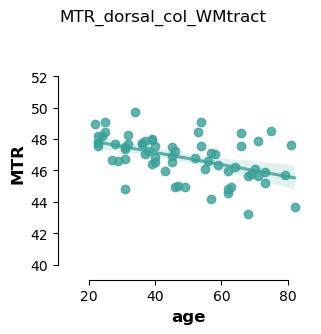

lat_funi


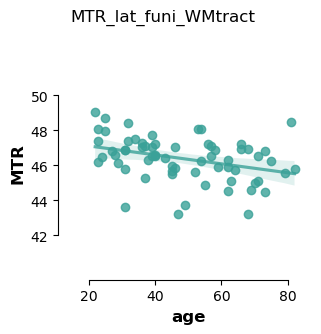

ventral_funi


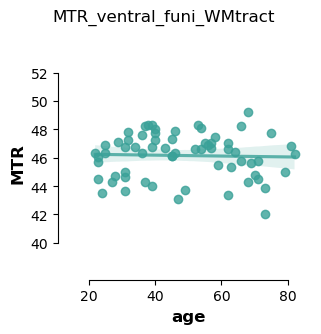

DWI
dorsal_col


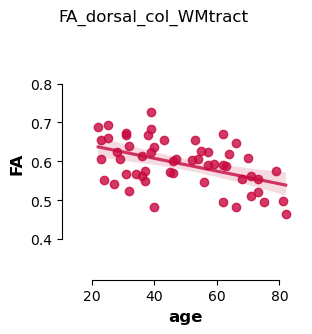

lat_funi


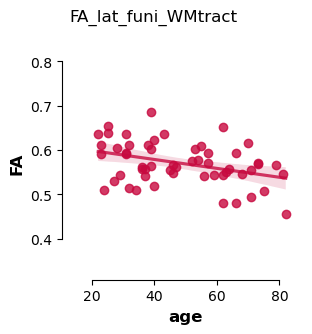

ventral_funi


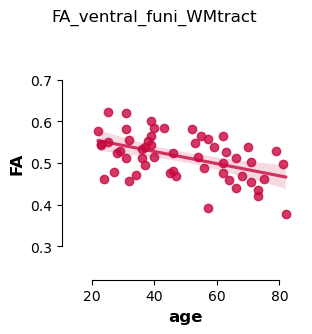

dorsal_col


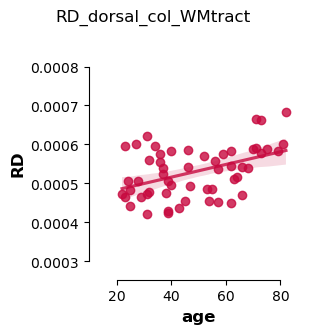

lat_funi


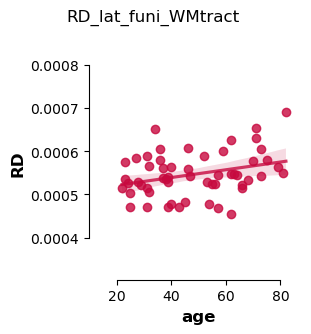

ventral_funi


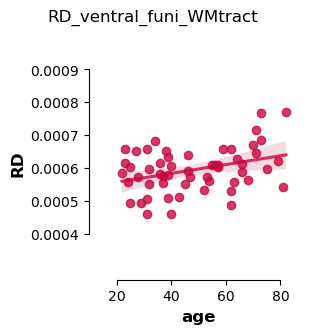

dorsal_col


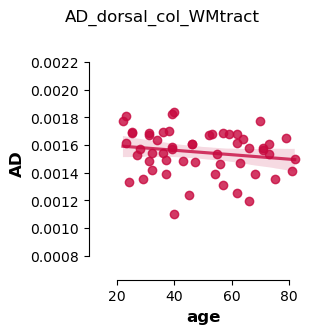

lat_funi


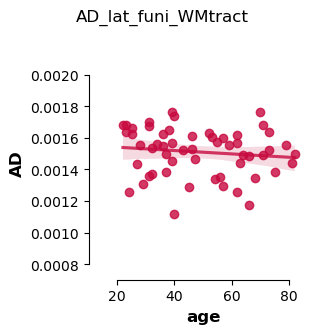

ventral_funi


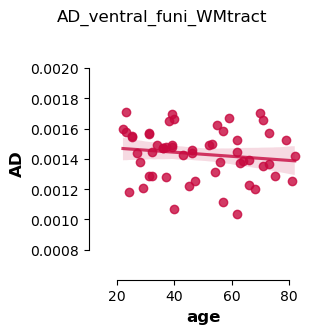

dorsal_col


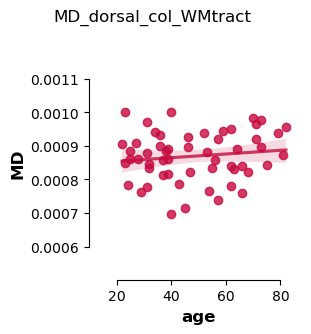

lat_funi


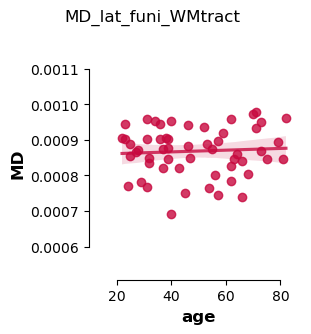

ventral_funi


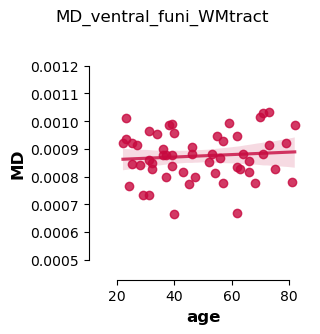

In [17]:
color=["#3AA198"]#,"#3AA198","#68BCB4","#86C9C3","#C3E4E1",
output_dir=config["project_dir"] +  "/figures/f01_structural/12june25/figures/"
for contrast in sub_metrics:
    print(contrast)
    color=["#3AA198"] if contrast=="MTR" else ["#C7093F"]
    
    for sub_metric in sub_metrics[contrast]:
        for roi in np.unique(df_metrics[contrast][sub_metric]["rois"]):
            print(roi)
            sub_df=df_metrics[contrast][sub_metric][df_metrics[contrast][sub_metric]["rois"]==roi]
            plot.lmplots(df=sub_df,color=color,
                         x_data="age",
                         y_data=sub_metric,xmin=15,xmax=85,
                     indiv_values=True,
                         output_dir=output_dir,output_tag=sub_metric + "_" +roi+"_WMtract",
                         save=True)